In [305]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [306]:
df = pd.read_csv('car_data.csv')
df.drop(df[df['Selling_Price'] == 35.0].index, inplace = True)

In [307]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       300 non-null    object 
 1   Year           300 non-null    int64  
 2   Selling_Price  300 non-null    float64
 3   Present_Price  300 non-null    float64
 4   Kms_Driven     300 non-null    int64  
 5   Fuel_Type      300 non-null    object 
 6   Seller_Type    300 non-null    object 
 7   Transmission   300 non-null    object 
 8   Owner          300 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 23.4+ KB


In [309]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [310]:
df.drop(df[df.duplicated()].index, inplace=True)

In [311]:
df.duplicated().any()

False

In [312]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       298 non-null    object 
 1   Year           298 non-null    int64  
 2   Selling_Price  298 non-null    float64
 3   Present_Price  298 non-null    float64
 4   Kms_Driven     298 non-null    int64  
 5   Fuel_Type      298 non-null    object 
 6   Seller_Type    298 non-null    object 
 7   Transmission   298 non-null    object 
 8   Owner          298 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 23.3+ KB


In [313]:
for ele in df.columns:
    counts = df[ele].value_counts().count()
    print(ele)
    print(counts)

Car_Name
97
Year
16
Selling_Price
155
Present_Price
146
Kms_Driven
206
Fuel_Type
3
Seller_Type
2
Transmission
2
Owner
3


In [314]:
df['Transmission'].value_counts()

Manual       259
Automatic     39
Name: Transmission, dtype: int64

In [315]:
# df.drop('Transmission', axis=1, inplace=True)

In [316]:
df['Owner'].value_counts()

0    287
1     10
3      1
Name: Owner, dtype: int64

In [317]:
df['Fuel_Type'].value_counts()

Petrol    239
Diesel     57
CNG         2
Name: Fuel_Type, dtype: int64

In [318]:
df['Seller_Type'].value_counts()

Dealer        192
Individual    106
Name: Seller_Type, dtype: int64

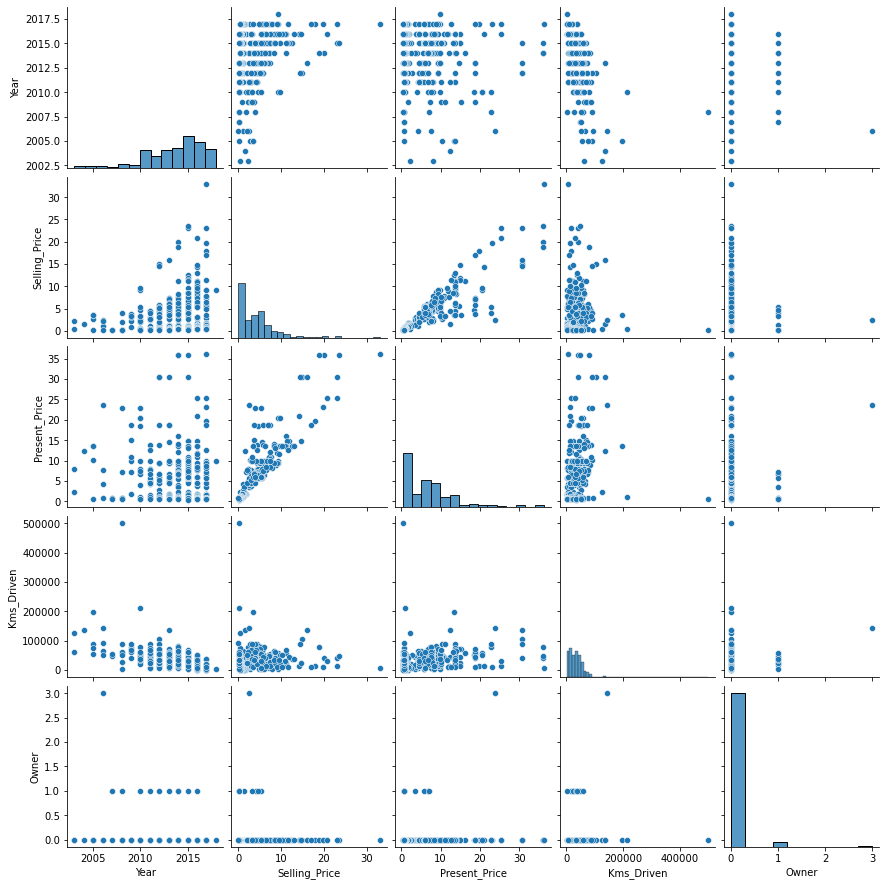

In [319]:
sns.pairplot(df)

<AxesSubplot:>

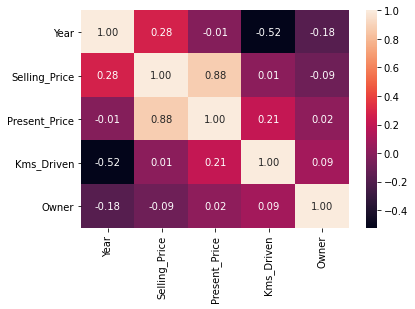

In [320]:
sns.heatmap(df.corr(), annot=True, fmt='.2f')

In [321]:
df.select_dtypes(include='object').columns

Index(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [322]:
df.drop('Car_Name', axis=1, inplace=True)

In [323]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,298.000000,298.000000,298.000000,298.000000,298.000000
mean,2013.627517,4.487584,7.255604,36778.889262,0.043624
std,2.894122,4.669269,7.015251,39007.777484,0.249126
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.825000,1.200000,15000.000000,0.000000
50%,2014.000000,3.505000,6.075000,31802.000000,0.000000
75%,2016.000000,5.987500,9.757500,48575.250000,0.000000
max,2018.000000,33.000000,36.230000,500000.000000,3.000000


In [324]:
def outlier_cap(x):
    x=x.clip(lower=x.quantile(0.25))
    x=x.clip(upper=x.quantile(0.75))
    return(x)

In [325]:
df['Year'] = outlier_cap(df['Year'])
df['Kms_Driven'] = outlier_cap(df['Kms_Driven'])
df['Present_Price'] = outlier_cap(df['Present_Price'])

In [326]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,298.000000,298.000000,298.000000,298.000000,298.000000
mean,2014.110738,4.487584,5.668196,31475.791107,0.043624
std,1.596867,4.669269,3.519893,13745.072610,0.249126
min,2012.000000,0.100000,1.200000,15000.000000,0.000000
25%,2012.000000,0.825000,1.200000,15000.000000,0.000000
50%,2014.000000,3.505000,6.075000,31802.000000,0.000000
75%,2016.000000,5.987500,9.703125,48431.437500,0.000000
max,2016.000000,33.000000,9.757500,48575.250000,3.000000


In [327]:
df = pd.get_dummies(df, drop_first=True)

In [328]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.5900,27000.0,0,0,1,0,1
1,2013,4.75,9.5400,43000.0,0,1,0,0,1
2,2016,7.25,9.7575,15000.0,0,0,1,0,1
3,2012,2.85,4.1500,15000.0,0,0,1,0,1
4,2014,4.60,6.8700,42450.0,0,1,0,0,1


<AxesSubplot:>

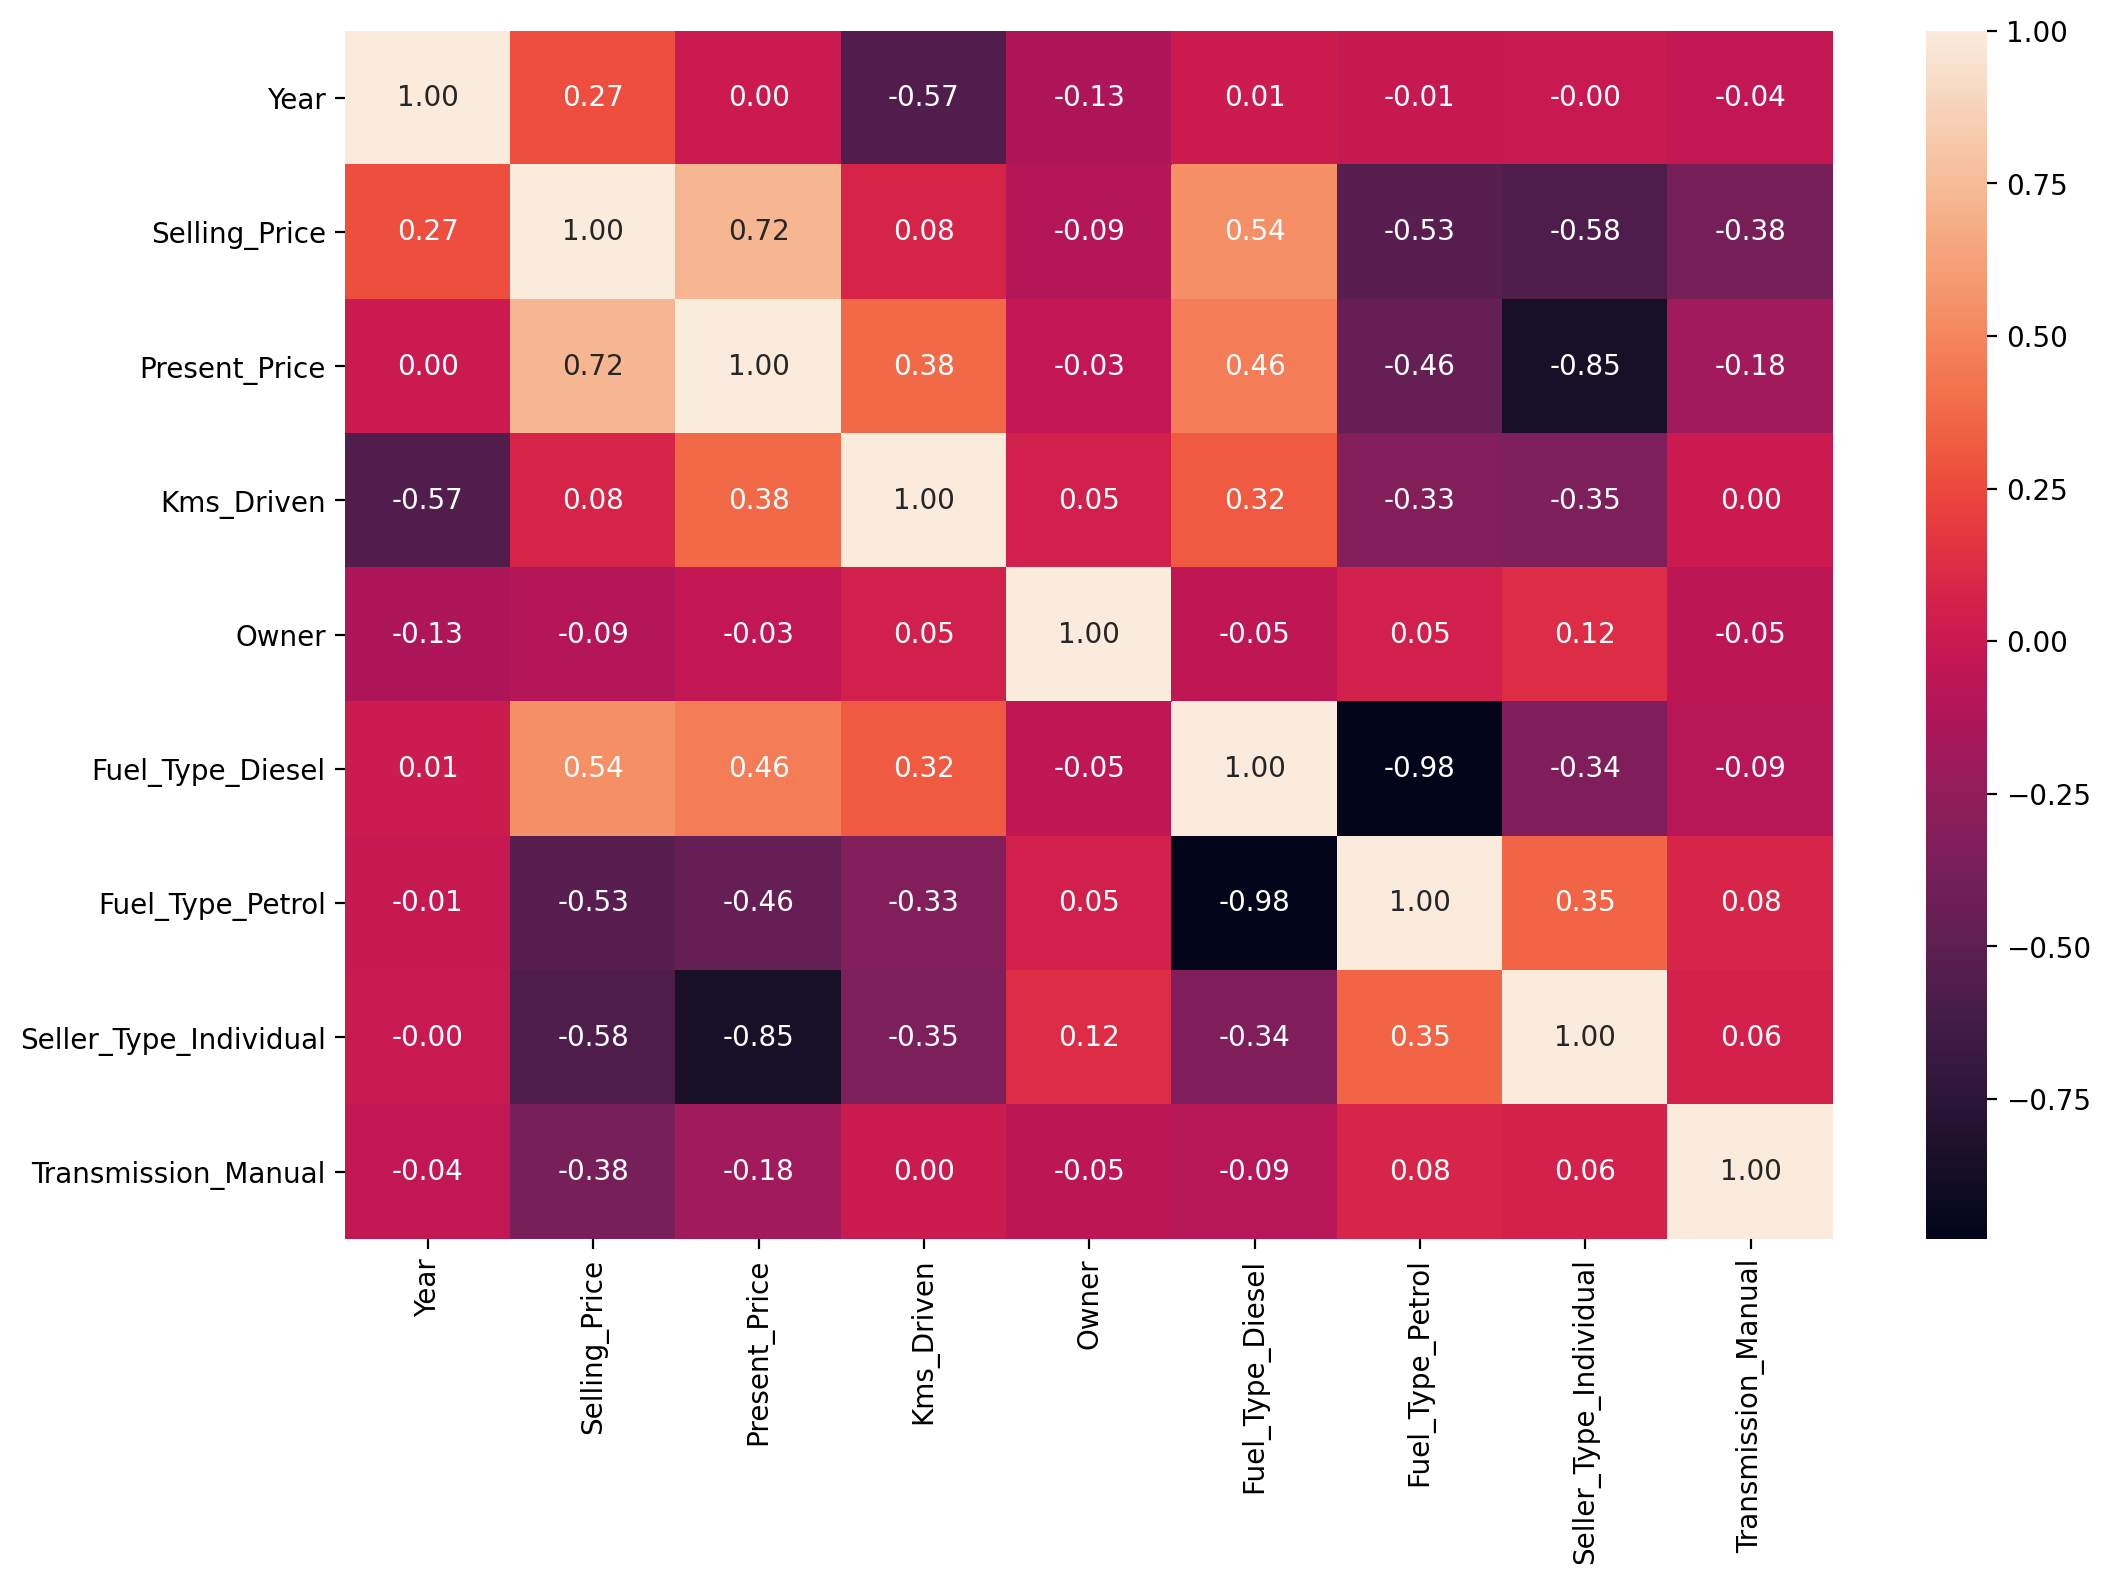

In [329]:
plt.figure(figsize=(12, 8), dpi=200)
sns.heatmap(df.corr(), annot=True, fmt='.2f')

In [330]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

In [331]:
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']
scaler = StandardScaler()

In [332]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [333]:
from sklearn.linear_model import LinearRegression

In [334]:
model = LinearRegression()

In [335]:
model.fit(scaled_X_train, y_train)

LinearRegression()

In [336]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [337]:
pred = model.predict(scaled_X_test)

In [338]:
r2_score(y_test, pred)

0.6577387138557359

In [339]:
np.sqrt(mean_squared_error(y_test, pred))

2.645740752449089

In [340]:
df['Selling_Price'].mean()

4.487583892617453

<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

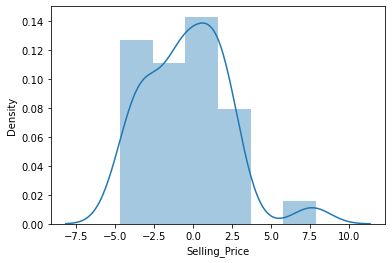

In [341]:
sns.distplot(y_test-pred, )

In [342]:
from sklearn.ensemble import RandomForestRegressor

In [343]:
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
max_depth=[5, 6, 7]
min_samples_split= [5,10,15,200]
min_samples_leaf= [5,10, 15, 200]

In [344]:
model = RandomForestRegressor()

In [345]:
random_grid={
    'n_estimators':n_estimators,
    'max_depth':max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
    }

In [346]:
rf_random=RandomizedSearchCV(estimator=model,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [347]:
rf_random.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=6, min_samples_leaf=5, min_samples_split=200, n_estimators=700; total time=   3.1s
[CV] END max_depth=6, min_samples_leaf=5, min_samples_split=200, n_estimators=700; total time=   2.8s
[CV] END max_depth=6, min_samples_leaf=5, min_samples_split=200, n_estimators=700; total time=   3.0s
[CV] END max_depth=6, min_samples_leaf=5, min_samples_split=200, n_estimators=700; total time=   3.3s
[CV] END max_depth=6, min_samples_leaf=5, min_samples_split=200, n_estimators=700; total time=   3.3s
[CV] END max_depth=5, min_samples_leaf=15, min_samples_split=10, n_estimators=1100; total time=   4.1s
[CV] END max_depth=5, min_samples_leaf=15, min_samples_split=10, n_estimators=1100; total time=   5.5s
[CV] END max_depth=5, min_samples_leaf=15, min_samples_split=10, n_estimators=1100; total time=   5.4s
[CV] END max_depth=5, min_samples_leaf=15, min_samples_split=10, n_estimators=1100; total time=   4.6s
[CV] END max_dept

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 6, 7],
                                        'min_samples_leaf': [5, 10, 15, 200],
                                        'min_samples_split': [5, 10, 15, 200],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [348]:
pred = rf_random.predict(scaled_X_test)

In [349]:
r2_score(y_test, pred)

0.8743194157716907

<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

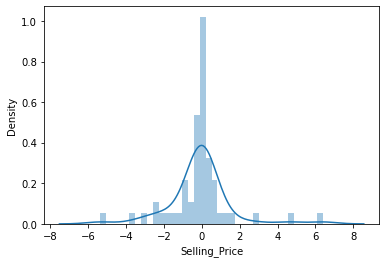

In [350]:
sns.distplot(y_test-pred)

In [351]:
np.sqrt(mean_squared_error(y_test, pred))

1.603254594854095

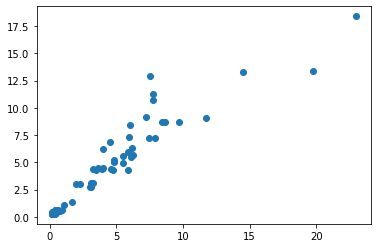

In [352]:
plt.scatter(y_test,pred)

In [353]:
import scipy as sp

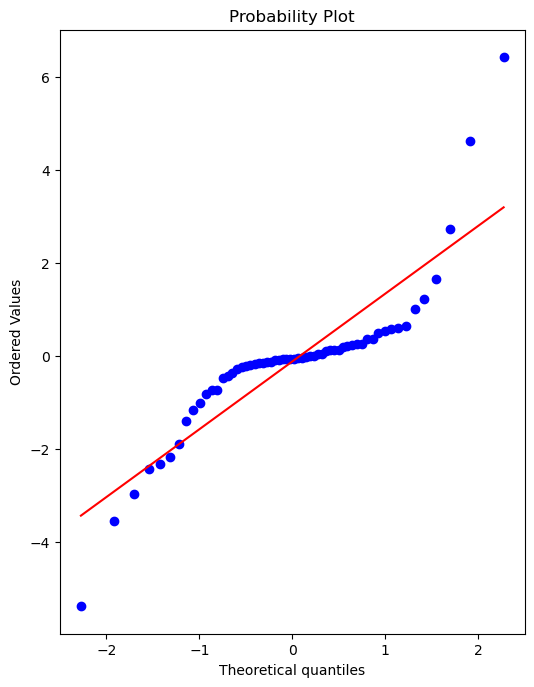

In [354]:
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
_ = sp.stats.probplot(y_test-pred,plot=ax)